# TensorFlow overview
While the homeworks will be written in torch, the labs are written in tensorflow. Most of the time, only a very basic tensorflow knowledge suffices for solving them. Since tensorflow is not used during other ML courses at MIMUW, we will introduce it briefly here.

In [ ]:
import tensorflow as tf
import numpy as np
import keras

#Tensors

Example tensor operations in tensorflow




In [ ]:
print(tf.math.add(1, 2))
print(tf.math.add([1, 2], [3, 4]))
print(tf.math.square(5))
print(tf.math.reduce_sum([1, 2, 3]))

# Operator overloading is also supported
print(tf.math.square(2) + tf.math.square(3))

In contrast to pytorch, in tensorflow numpy arrays can be used instead of tf.Tensor - they get converted automatically:

In [ ]:
import numpy as np

ndarray = np.ones([3, 3])

print("TensorFlow operations convert numpy arrays to Tensors automatically")
tensor = tf.math.multiply(ndarray, 42)
print(tensor)

print("And NumPy operations convert Tensors to NumPy arrays automatically")
print(np.add(tensor, 1))

Tensorflow automatically decides which device to choose for execution - it moves tensors between GPU and CPU as needed. Of course it is also possible to do it manually.

In [ ]:
x = tf.random.uniform([3, 3])

print("Is there a GPU available: "),
print(tf.config.list_physical_devices("GPU"))

print("Is the Tensor on GPU #0:  "),
print(x.device.endswith('GPU:0'))


In [ ]:
###########################################
# Implement mse loss                      #
# using vector operations from tensorflow #
###########################################

def mse_loss(y_true, y_pred):
  ### TODO ###
  assert y_true.shape[0] == y_pred.shape[0]
  return tf.math.reduce_mean((y_true - y_pred)**2)
  ### END ###


loss_fn = tf.keras.losses.MeanSquaredError()
y_true = np.random.rand(4, 10)
y_pred = np.random.rand(4, 10)
print(loss_fn(y_true, y_pred))
print(mse_loss(y_true, y_pred.astype(np.float64)))
assert np.isclose(loss_fn(y_true, y_pred), mse_loss(y_true, y_pred.astype(np.float64)))

## Dataset Definition
The dataset we will be using for network training is Cifar10.

In [ ]:
dataset = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = dataset.load_data()

##############################################
# Scale the data to be in (0, 1) interval    #
##############################################
### TODO ###
x_train = tf.divide(x_train, tf.reduce_max(x_train))
x_test = tf.divide(x_test, tf.reduce_max(x_test))
### END ###

In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test))

## Keras Sequential
The most straightforward wat to define a model is using Keras Sequential.

In [ ]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(32, 32, 3)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

We can use `keras.utils.plot_model` to plot the model.

In [ ]:
keras.utils.plot_model(model, "dense_model.png")

We can call the model as in torch. The mode that the model is called in can be specified by passing the `training` argument.

In [ ]:
features = tf.random.normal((10, 32, 32, 3))
predictions = model(features, training=False)

print(predictions)

Then we can convert it to logits and find the predictions

In [ ]:
##########################################
#   Convert the predictions to logits    #
#   And calculate the resulting label    #
##########################################

### TODO ###
label = tf.argmax(tf.nn.softmax(predictions, -1), -1)
print(label)
### END ###

Using your background from the dnn course and layers from `tf.keras.layers`  define the model so that the accuracy of 0.5 is reached within 5 epochs.

In [ ]:
##############################################
# Define a convolutional network             #
# That gets an accuracy over 50% in 5 epochs #
##############################################
from keras import layers, models

dataset = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = dataset.load_data()

### TODO ###
model = tf.keras.models.Sequential()
input_shape=(32, 32, 3)
num_classes=10

# First conv block
model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=input_shape))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

# Second conv block
model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

# Third conv block
model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

# Flatten and dense layers
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(layers.Dense(num_classes))

### END ###

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

## Keras Functional API
Keras functional API allows for creating more flexible models than `keras.Sequential`. It will therefore be useful during this course.

In [ ]:
import keras
from keras import layers

Let's build the same dense model as before.

In [ ]:
inputs = keras.Input(shape=(3072,))
dense = layers.Dense(64, activation="relu")
x = dense(inputs)
x = layers.Dropout(0.2)(x)
x = layers.Dense(64, activation="relu")(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(64, activation="relu")(x)
x = layers.Dropout(0.2)(x)
outputs = layers.Dense(10)(x)

model = keras.Model(inputs=inputs, outputs=outputs)

And again fit it to the data.

In [ ]:
##################################
# Flatten the images             #
##################################
### TODO ###
x_flat_train = tf.reshape(x_train, (x_train.shape[0], -1))
x_flat_test = tf.reshape(x_test, (x_test.shape[0], -1))
### DONE ###

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

##############################################
# Train the model with batch size 128        #
# And learning rate 0.001                    #
##############################################
### TODO ###
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=loss_fn,
              metrics=['accuracy'])

model.fit(x_flat_train, y_train, batch_size=128, epochs=5)
### DONE ###

test_loss, test_acc = model.evaluate(x_flat_test,  y_test, verbose=2)

Define the same network as in the previous exercise, but using the functional approach.

Write a training loop that does the same thing as happens above manually.

Create network with a plot like this on right.

In [ ]:
######################################
# Define the same convnet as before, #
# But use the functional API         #
######################################

### TODO ###
inputs = keras.Input(shape=(32, 32, 3))

# First conv block
x = layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform')(inputs)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D((2, 2), strides=(2, 2))(x)

# Second conv block
x = layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform')(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D((2, 2), strides=(2, 2))(x)

# Third conv block
x = layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform')(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D((2, 2), strides=(2, 2))(x)

# Flatten and dense layers
x = layers.Flatten()(x)
x = layers.Dense(128, activation='relu', kernel_initializer='he_uniform')(x)
outputs = layers.Dense(10)(x)

### END ###

model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

In [ ]:
######################################
# Add a residual connection to your #
# convnet, use the functional API   #
######################################

### TODO ###
inputs = keras.Input(shape=(32, 32, 3))

# First conv block
x = layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform')(inputs)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D((2, 2), strides=(2, 2))(x)

# Second conv block
x = layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform')(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D((2, 2), strides=(2, 2))(x)

# Third conv block
x = layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform')(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D((2, 2), strides=(2, 2))(x)

# Flatten and dense layers
x = layers.Flatten()(x)
x = layers.Dense(32 * 32 * 3, activation='relu', kernel_initializer='he_uniform')(x)

# Residual connection
flatten_inputs = layers.Flatten()(inputs)
x = layers.add([flatten_inputs, x])

x = layers.Dense(128, activation='relu', kernel_initializer='he_uniform')(x)
outputs = layers.Dense(10)(x)

### END ###

model = keras.Model(inputs=inputs, outputs=outputs)

keras.utils.plot_model(model, "residual_model.png")

Sometimes just using `.fit` method might not be enough. It is also possible to write the training loop more from scratch.

In [ ]:
batch_size = 32

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
ds_train_batch = train_dataset.batch(batch_size)
ds_test_batch = test_dataset.batch(batch_size)


def simple_forward(x, model, training):
    ########################################
    #   Get the predictions from the model #
    ########################################

    ### TODO ###
    return model(x, training=training)
    ### END ###


def loss(model, x, y, training, forward_fn):
    # training=training is needed only if there are layers with different
    # behavior during training versus inference (e.g. Dropout).
    y_ = forward_fn(x, model, training)
    return loss_fn(y_true=y, y_pred=y_)


@tf.function
def grad(model, inputs, targets, forward_fn):
    with tf.GradientTape() as tape:
      loss_value = loss(model, inputs, targets, training=True, forward_fn=forward_fn)

    return loss_value, tape.gradient(loss_value, model.trainable_variables)


def run_training(optimizer, num_epochs, model, forward_fn):
    for epoch in range(num_epochs):
      epoch_loss_avg = tf.keras.metrics.Mean()
      epoch_accuracy = tf.keras.metrics.SparseCategoricalAccuracy()

      test_epoch_loss_avg = tf.keras.metrics.Mean()
      test_epoch_accuracy = tf.keras.metrics.SparseCategoricalAccuracy()

      for x, y in ds_train_batch:
        loss_value, grads = grad(model, x, y, forward_fn)

        ########################
        # Apply the gradients  #
        ########################

        ### TODO ###
        optimizer.apply_gradients(zip(grads, model.trainable_variables))
        ### END ###

        epoch_loss_avg.update_state(loss_value)
        epoch_accuracy.update_state(y, model(x, training=True))

      print("Epoch {:03d}: Loss: {:.3f}, Accuracy: {:.3%}".format(epoch,
                                                                  epoch_loss_avg.result(),
                                                                    epoch_accuracy.result()))

      ######################
      # Run the test epoch #
      ######################
      ### TODO ###
      for x, y in ds_test_batch:
        test_loss_value = loss(model, x, y, training=False, forward_fn=forward_fn)
        test_epoch_loss_avg.update_state(test_loss_value)
        test_epoch_accuracy.update_state(y, model(x, training=False))
      
      print("Test set: Loss: {:.3f}, Accuracy: {:.3%}".format(test_epoch_loss_avg.result(),
                                                              test_epoch_accuracy.result()))
      ### END ###

optimizer = tf.keras.optimizers.Adam()
num_epochs = 5

run_training(optimizer, num_epochs, model, simple_forward)

Humans have two eyes. Let's try to simulate something similar with a neural network, that is train a separate encoder for the left and right parts of the image and then encode them together. Your network should have a plot similar to this one: 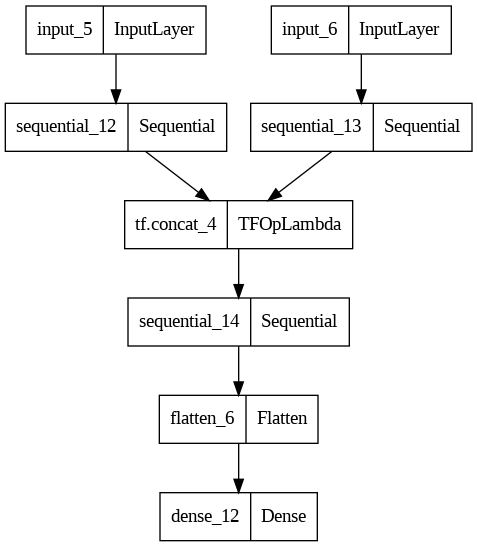

In [ ]:
#######################################
# Split x_train and x_test into       #
# two inputs with shapes (32, 16, 3)  #
#######################################

### TODO ###
x_train_left, x_train_right = x_train[:, :, :16, :], x_train[:, :, 16:, :]
x_test_left, x_test_right = x_test[:, :, :16, :], x_test[:, :, 16:, :]
### END ###

In [ ]:
num_epochs = 5

def get_block(input_shape):
  model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(3, 3, activation='relu', input_shape=input_shape, padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(3, 3, activation='relu', input_shape=input_shape, padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(3, 3, activation='relu', input_shape=input_shape, padding='same'),
    tf.keras.layers.BatchNormalization(),
  ])

  return model



def build_model(left_model, right_model, out_model):
  #######################################
  # Build the model so that its plot    #
  # resembles the one from the image    #
  #######################################

  ### TODO ###
  left_input = tf.keras.layers.Input(shape=(32, 16, 3))
  right_input = tf.keras.layers.Input(shape=(32, 16, 3))
  x = left_model(left_input)
  y = right_model(right_input)
  z = tf.keras.layers.concatenate([x, y], -2)
  out = out_model(z)
  out_flat = tf.keras.layers.Flatten()(out)
  outputs = tf.keras.layers.Dense(10, activation='softmax')(out_flat)

  return keras.Model(inputs=[left_input, right_input], outputs=outputs)
  ### END ###

In [ ]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)

left_model = get_block((32, 16, 3))
right_model = get_block((32, 16, 3))
out_model = get_block((32, 32, 3))

model = build_model(left_model, right_model, out_model)
keras.utils.plot_model(model, "two_inputs_model.png")

model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

###################
# Fit the model   #
###################
### TODO ###
model.fit([x_train_left, x_train_right], y_train, epochs=5)
### END ###

#######################
# Evaluate the model  #
#######################
### TODO ###
test_loss, test_acc = model.evaluate([x_test_left, x_test_right],  y_test, verbose=2)
### END ###